<a href="https://colab.research.google.com/github/Sushmitha-712/bmi-app/blob/main/binary_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting 'mnist.csv'
✅ Dataset extracted successfully
Shape: (70000, 784)

Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Model trained successfully!

📊 Model Evaluation Results:
Accuracy  : 0.9744
Precision : 0.8926
Recall    : 0.8162
F1 Score  : 0.8527

Confusion Matrix:
[[12602   125]
 [  234  1039]]

Classification Report:
              precision    recall  f1-score   support

       Not 5       0.98      0.99      0.99     12727
           5       0.89      0.82      0.85      1273

    accuracy                           0.97     14000
   macro avg       0.94      0.90      0.92     14000
weighted avg       0.97      0.97      0.97     14000



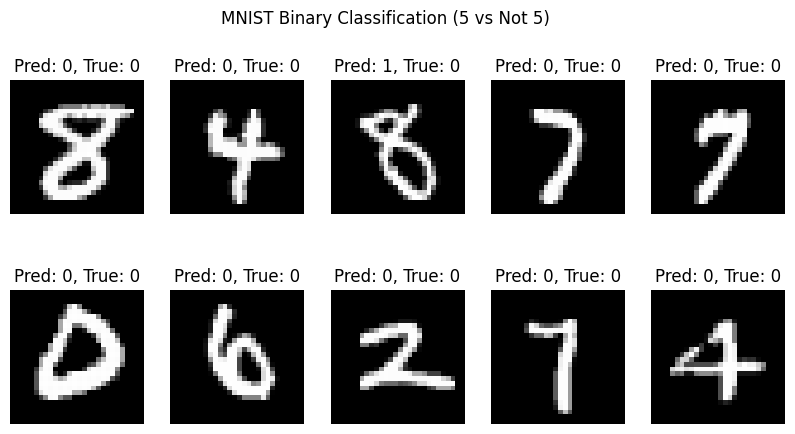

In [3]:
# ===============================================
# Objective: Implement a classifier for the MNIST dataset
# Task: Train a binary classifier and evaluate its performance
# ===============================================

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)


print("Extracting 'mnist.csv'")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)
print("✅ Dataset extracted successfully")
print("Shape:", X.shape)


y_binary = (y == 5).astype(int)


# -------------------------------------------------------------
# Step 4: Split train and test data
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# -------------------------------------------------------------
# Step 5: Train classifier (Logistic Regression)
# -------------------------------------------------------------
print("\nTraining Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# -------------------------------------------------------------
# Step 6: Make predictions
# -------------------------------------------------------------
y_pred = model.predict(X_test)

# -------------------------------------------------------------
# Step 7: Evaluate performance
# -------------------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# -------------------------------------------------------------
# Step 8: Confusion Matrix & Report
# -------------------------------------------------------------
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not 5", "5"]))

# -------------------------------------------------------------
# Step 9: Visualize a few results
# -------------------------------------------------------------
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.suptitle("MNIST Binary Classification (5 vs Not 5)")
plt.show()
